In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import pandas as pd
import matplotlib.pyplot as plt

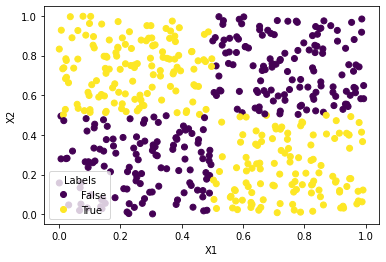

In [10]:
#Simulate two features and ground truth labels.
X = np.random.rand(500,2)
y = np.zeros((500,1))
y = ((X[:,0]<0.5)*(X[:,1]>=0.5)*1) + ((X[:,0]>=0.5)*(X[:,1]<0.5)*1)

scatter = plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(handles=scatter.legend_elements()[0],title="Labels",labels=['False','True'])
plt.show()

Here is where we are going to fit our simple neural network, to try to accurately predict the outcome label.

Questions: 

* What is the topology of the initial network? Describe it. 
* Can we do better by adding another 'linear' layer?
* Can we do better by adding more nodes to our 'linear' layer? 
* Can we do better by changing the activation function?


In [25]:
model = keras.Sequential([
      layers.Dense(units=10,activation="tanh"),
      layers.Dense(units=10,activation="tanh"),
      layers.Dense(units=5,activation="tanh"),
      layers.Dense(units=1,activation="sigmoid")
])

model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy','mse','mae'])

history = model.fit(X,y,epochs=500,batch_size=50,validation_split=0.2)

Epoch 1/500
8/8 [==============================] - 1s 33ms/step - loss: 0.6986 - accuracy: 0.6225 - mse: 0.2526 - mae: 0.4998 - val_loss: 0.7094 - val_accuracy: 0.5700 - val_mse: 0.2580 - val_mae: 0.5064
Epoch 2/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6980 - accuracy: 0.6275 - mse: 0.2523 - mae: 0.5001 - val_loss: 0.7088 - val_accuracy: 0.5700 - val_mse: 0.2577 - val_mae: 0.5061
Epoch 3/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6964 - accuracy: 0.6375 - mse: 0.2516 - mae: 0.5003 - val_loss: 0.7085 - val_accuracy: 0.5600 - val_mse: 0.2576 - val_mae: 0.5060
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 0.6956 - accuracy: 0.6325 - mse: 0.2511 - mae: 0.4996 - val_loss: 0.7063 - val_accuracy: 0.5700 - val_mse: 0.2565 - val_mae: 0.5053
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 0.6949 - accuracy: 0.6500 - mse: 0.2508 - mae: 0.4997 - val_loss: 0.7052 - val_accuracy: 0.5600 - val_mse: 0.2560 -

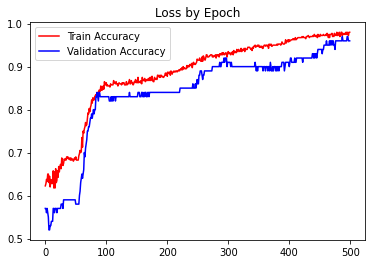

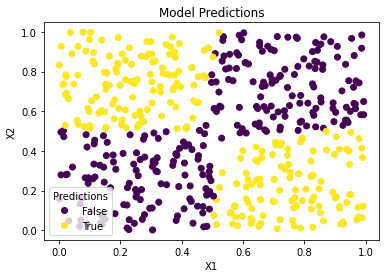

In [26]:
plt.plot(history.history['accuracy'],c="r")
plt.plot(history.history['val_accuracy'],c="b")
plt.legend(['Train Accuracy','Validation Accuracy'])
plt.title("Loss by Epoch")
plt.show()

predictions = model(X)
scatter = plt.scatter(X[:,0],X[:,1],c=(predictions.numpy()>0.5))
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(handles=scatter.legend_elements()[0],title="Predictions",labels=['False','True'])
plt.title("Model Predictions")
plt.show()

In [13]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Set these things aside for now we will come back to them later.

In [ ]:
# X = np.divide(X,np.max(X))
# X = np.concatenate((X,(X[:,0]*X[:,1]).reshape(500,1)),axis=1)